# Table of Content

1. Background
2. Problem Identification
3. Data Source
4. Import Libraries
5. Reading Data
6. Statistical Information about the Data
7. Data Cleansing
8. Exploratory Data Analyst (EDA)
9. Conclusion & Recommendation
10. Connecting Data to Database MySQL

# 1. Background

Dalam era kompetitif industri ritel, pemahaman yang mendalam terhadap tren penjualan dan pola perilaku pelanggan menjadi kunci utama untuk mencapai kesuksesan bisnis. Dengan data penjualan yang kaya akan informasi, perusahaan dapat mengidentifikasi peluang untuk meningkatkan efisiensi operasional, memperkuat hubungan dengan pelanggan, dan mengoptimalkan strategi pemasaran. 

Analisis menyeluruh tentang penjualan tidak hanya mencakup evaluasi performa produk dan wilayah penjualan, tetapi juga mempertimbangkan faktor-faktor seperti keuntungan, diskon, dan metode pengiriman yang digunakan. Dari sinilah, perusahaan dapat merumuskan langkah-langkah strategis yang tepat untuk memperkuat posisinya di pasar dan meningkatkan profitabilitasnya. Dengan demikian, memahami data penjualan menjadi fondasi yang kuat untuk mengarahkan keputusan bisnis yang efektif dan efisien.

# 2. Problem Identification

a. Penjualan
- Berapa jumlah total penjualan di setiap kategori produk?
- Berapa persentase perbandingan total keuntungan yang dihasilkan dari semua wilayah?
- Bagaimana pertumbuhan penjualan dari tahun ke tahun, apakah ada peningkatan atau penurunan yang signifikan?
- Bagaimana tren penjualan bulanan dari tahun 2017 hingga 2020?
- Bagaimana profit penjualan bulanan dari tahun 2017 hingga 2020?

b. Pelanggan
- Siapa pelanggan yang melakukan pembelian tertinggi (dilihat dari jumlah penjualan) dan detail pembelian mereka apa saja?
- Bagaimana distribusi segmen pelanggan dalam data?

c. Metode Pengiriman
- Berapa jumlah pesanan yang dikirim menggunakan metode pengiriman "Second Class"?

d. Diskon dan Keuntungan
- Berapa persentase diskon rata-rata yang diberikan untuk setiap kategori produk?
- Kategori produk mana yang memiliki margin keuntungan rata-rata tertinggi?

e. Produk
- Berapa total kuantitas yang terjual untuk setiap sub-kategori produk?
- Apakah ada kategori produk tertentu yang mendominasi penjualan? Bagaimana distribusi penjualan di antara sub-kategori produk?

# 3. Data Source

a. Data Tabel Order
1. Row ID : Baris index digunakan untuk identifikasi tunggal setiap baris
2. Order ID	: ID unik pesanan item untuk pelanggan
3. Order Date : Tanggal pelanggan membeli item 
4. Ship Date : Tanggal pengiriman pesanan item pelanggan
5. Ship Mode : Metode pengiriman untuk mengirimkan pesanan kepada pelanggan
6. Customer ID : ID unik untuk setiap pelanggan
7. Country/Region : Negara tempat pelanggan melakukan pesanan
8. Postal Code : Kode pos wilayah tempat pelanggan tinggal
9. Region : Wilayah geografis di mana pesanan dikirimkan
10. Product ID : ID unik untuk setiap item yang dijual
11. Category : Kategori untuk setiap item
12. Sub-Category : Kategori spesifik dari setiap item
13. Product Name : Nama item yang dijual
14. Sales : Jumlah penjualan dari setiap item
15. Quantity : Jumlah unit item yang dibeli pelanggan
16. Discount : Jumlah potongan harga disetiap item
17. Profit : Keuntungan yang dihasilkan dari penjualan item

b. Data Tabel Customer
1. Customer ID : ID unik untuk setiap pelanggan
2. Customer Name : Nama pelanggan yang memesan
3. Segment : Mengkategorikan pelanggan berdasarkan kriteria tertentu
4. City : Kota tempat tinggal pelanggan
5. State : Negara tempat tinggal pelanggan berada

# 4. Import Libraries

In [1]:
# import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
import mysql.connector
%matplotlib inline
print('Success')

Success


# 5. Reading Data

a. Data Orders

In [2]:
df_order = pd.read_excel('C:\\Users\Admin\Documents\GitHub\Portofolio-Data-Analyst\Project 2\Sample - Superstore - Wanda.xlsx', sheet_name = 'Orders')
df_order.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
df_order.shape

(9994, 17)

b. Data Customers

In [4]:
df_customer = pd.read_excel('C:\\Users\Admin\Documents\GitHub\Portofolio-Data-Analyst\Project 2\Sample - Superstore - Wanda.xlsx', sheet_name='Customer')
df_customer.head(3)

,Customer ID,Customer Name,Segment,City,State
0,CG-12520,Claire Gute,Consumer,Henderson,Kentucky
1,CG-12520,Claire Gute,Consumer,Henderson,Kentucky
2,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California


In [5]:
df_customer.shape

(9994, 5)

# 6. Statistical Information about the Data

In [6]:
df_order.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2019-04-30 17:41:20.448268800,2019-05-04 16:42:15.921553152,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2017-01-03 00:00:00,2017-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2018-05-23 00:00:00,2018-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2019-06-26 00:00:00,2019-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2020-05-14 00:00:00,2020-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2020-12-30 00:00:00,2021-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [7]:
df_customer.describe()

,Customer ID,Customer Name,Segment,City,State
count,9994,9994,9994,9994,9994
unique,793,793,3,531,49
top,WB-21850,William Brown,Consumer,New York City,California
freq,37,37,5191,915,2001


# 7. Data Cleansing

a. Information about the Data Customer

In [8]:
info_order = pd.DataFrame({
    'No': range(1, len(df_order.columns) + 1),  # Menambahkan nomor kolom
    'Nama Kolom': df_order.columns.tolist(),  # Menambahkan nama kolom
    'Type Data': df_order.dtypes.values,  # Menambahkan tipe data
    'Unique': df_order.nunique(),  # Menambahkan nilai unik
    'Null': df_order.isna().any(),  # Menambahkan nulitas
    'Row, Column': [df_order.shape] * len(df_order.columns)  # Menambahkan bentuk
})

info_order.set_index('No', inplace=True)  # Mengatur nomor kolom sebagai indeks

info_order

,Nama Kolom,Type Data,Unique,Null,"Row, Column"
No,,,,,
1,Row ID,int64,9994,False,"(9994, 17)"
2,Order ID,object,5009,False,"(9994, 17)"
3,Order Date,datetime64[ns],1236,False,"(9994, 17)"
4,Ship Date,datetime64[ns],1334,False,"(9994, 17)"
5,Ship Mode,object,4,False,"(9994, 17)"
6,Customer ID,object,793,False,"(9994, 17)"
7,Country/Region,object,1,False,"(9994, 17)"
8,Postal Code,float64,630,True,"(9994, 17)"
9,Region,object,4,False,"(9994, 17)"


b. Information about the Data Customer

In [9]:
info_customer = pd.DataFrame({
    'No': range(1, len(df_customer.columns) + 1),  # Menambahkan nomor kolom
    'Nama Kolom': df_customer.columns.tolist(),  # Menambahkan nama kolom
    'Type Data': df_customer.dtypes.values,  # Menambahkan tipe data
    'Unique': df_customer.nunique(),  # Menambahkan nilai unik
    'Null': df_customer.isna().any(),  # Menambahkan nulitas
    'Row, Column': [df_customer.shape] * len(df_customer.columns)  # Menambahkan bentuk
})

info_customer.set_index('No', inplace=True)  # Mengatur nomor kolom sebagai indeks

info_customer

,Nama Kolom,Type Data,Unique,Null,"Row, Column"
No,,,,,
1,Customer ID,object,793,False,"(9994, 5)"
2,Customer Name,object,793,False,"(9994, 5)"
3,Segment,object,3,False,"(9994, 5)"
4,City,object,531,False,"(9994, 5)"
5,State,object,49,False,"(9994, 5)"


c. Checking Duplicated Data Customer

In [10]:
# df_customer.duplicated().sum()

d. Drop Duplicated Data Customer

In [11]:
# df_customer.drop_duplicates(inplace=True)
# print('success')

e. Checking Duplicated Data Order

In [12]:
# df_order.duplicated().sum()

f. Change Missing values (NaN) to 0

In [13]:
df_order['Postal Code'].fillna(0, inplace=True)
print('Success')

Success


g. Change Type data

In [14]:
df_order['Postal Code'] = df_order['Postal Code'].astype(int)
print('Success')

Success


In [15]:
df_order.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Country/Region    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

h. drop column 'Row ID'

In [16]:
df_order.drop(columns=['Row ID'], inplace=True)

# 8. Exploratory Data Analyst (EDA)

### a. Penjualan

- Berapa jumlah total penjualan di setiap kategori produk?

In [17]:
df_order.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


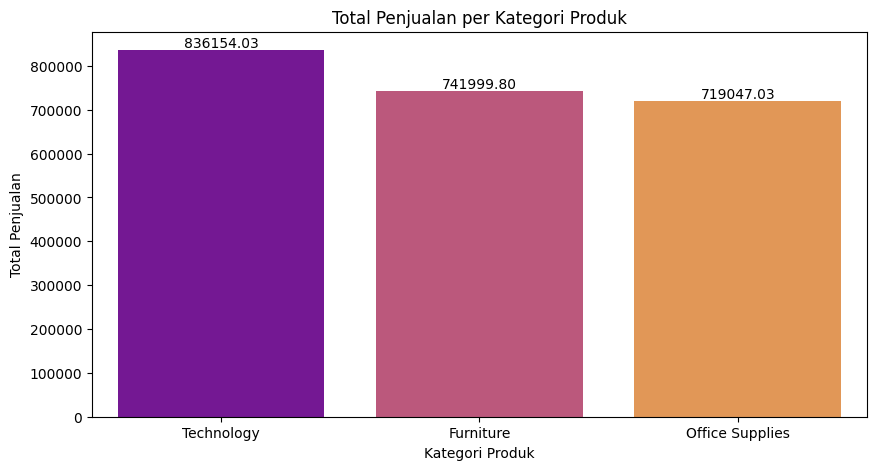

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsi df_order sudah ada dan siap digunakan

# Mengelompokkan data berdasarkan kategori produk dan menjumlahkan kolom penjualan
sales_by_category = df_order.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Menampilkan total penjualan untuk setiap kategori produk
print(sales_by_category)

# Membuat plot menggunakan seaborn
plt.figure(figsize=(10, 5))
sns.barplot(
    x=sales_by_category.index,
    y=sales_by_category.values,
    hue=sales_by_category.index,
    palette='plasma'
)

# Menambahkan label pada barplot
for index, value in enumerate(sales_by_category.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Menambahkan title
plt.title('Total Penjualan per Kategori Produk')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')

# Menampilkan plot
plt.show()


- Berapa total keuntungan yang dihasilkan dari penjualan di wilayah Selatan?

In [19]:
print(df_order.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Country/Region', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [20]:
print(df_customer.columns)

Index(['Customer ID', 'Customer Name', 'Segment', 'City', 'State'], dtype='object')


In [21]:
subset = df_order[['Profit','Region']]
subset.head()

,Profit,Region
0,41.9136,South
1,219.5820,South
2,6.8714,West
3,-383.0310,South
4,2.5164,South


In [22]:
subset_south = subset[subset['Region']=='South']
subset_south.head()

,Profit,Region
0,41.9136,South
1,219.5820,South
3,-383.0310,South
4,2.5164,South
12,5.4432,South


In [23]:
total_profit = subset_south['Profit'].sum()
print('Jumlah Total Profit wilayah selatan =', total_profit)

Jumlah Total Profit wilayah selatan = 46749.43029999999


- Berapa persentase perbandingan total keuntungan yang dihasilkan dari semua wilayah?

In [24]:
total_profit_by_region = subset.groupby('Region')['Profit'].sum()
total_profit_by_region

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [25]:
total_profit_all_regions = total_profit_by_region.sum()

# Menghitung persentase profit di setiap wilayah
percentage_profit_per_region = (total_profit_by_region / total_profit_all_regions) * 100
percentage_profit_per_region

Region
Central    13.864098
East       31.956610
South      16.323295
West       37.855997
Name: Profit, dtype: float64

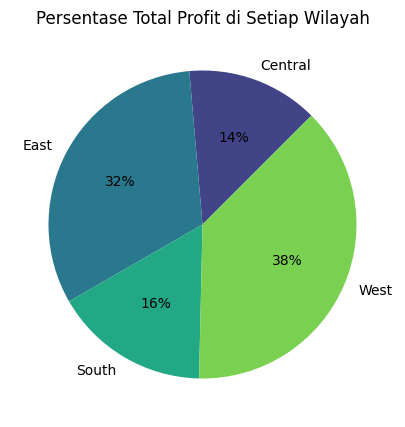

In [26]:
plt.figure(figsize=(10, 5))
pallete = sns.color_palette("viridis", len(percentage_profit_per_region))
plt.pie(
    percentage_profit_per_region,
    labels=percentage_profit_per_region.index,
    autopct='%.0f%%',
    startangle=45,
    colors=pallete)
plt.title('Persentase Total Profit di Setiap Wilayah')
plt.show()

- Bagaimana pertumbuhan penjualan dari tahun ke tahun, apakah ada peningkatan atau penurunan yang signifikan?

In [27]:
# sales_per_year = df_order.groupby('Year')['Sales'].sum().reset_index()
# sales_per_year

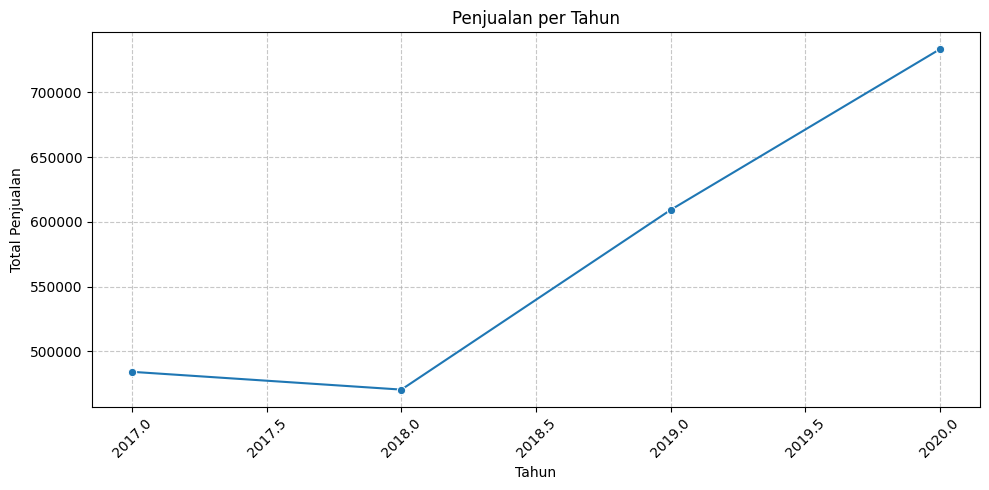

In [28]:
# Merubah Order Date ke dalam format date time
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'])

# Ekstrak tahun dari kolom Order Date
df_order['Year'] = df_order['Order Date'].dt.year

# Kelompokkan berdasarkan tahun dan hitung jumlah penjualan
sales_per_year = df_order.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=sales_per_year,
    x='Year',
    y='Sales',
    marker='o')
plt.title('Penjualan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
sales_per_year

,Year,Sales
0,2017,484247.4981
1,2018,470532.5090
2,2019,609205.5980
3,2020,733215.2552


- Adakah bulan yang menunjukkan penurunan signifikan dalam penjualan di tahun 2017-2020?

C:\Users\Admin\AppData\Local\Temp\ipykernel_10992\1891877588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_2018['Month'] = df_order_2018['Order Date'].dt.month


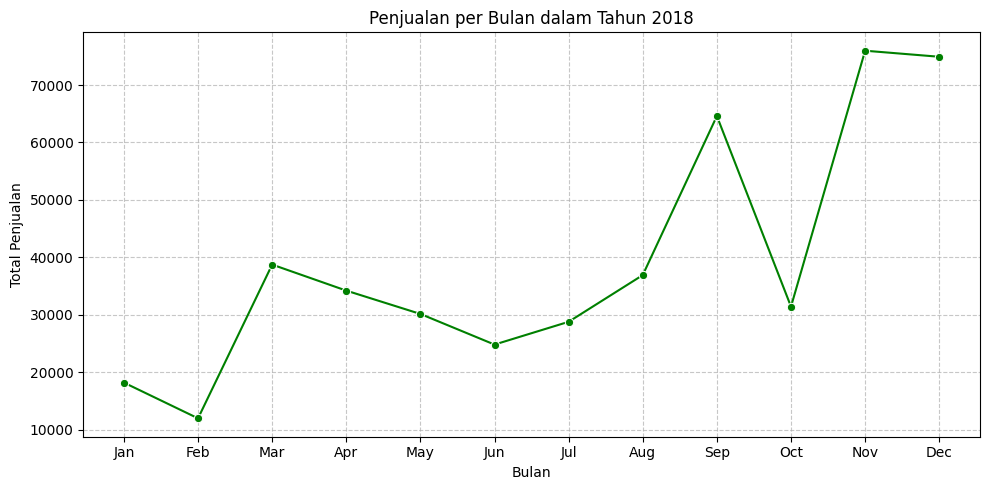

In [30]:
# Konversi kolom Order Date ke format datetime
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'])

# Filter data tahun 2018
df_order_2018 = df_order[df_order['Order Date'].dt.year == 2018]

# Ekstrak bulan dari kolom "Order Date"
df_order_2018['Month'] = df_order_2018['Order Date'].dt.month

# Kelompokkan berdasarkan bulan dan hitung jumlah penjualan
sales_per_month_2018 = df_order_2018.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_per_month_2018, x='Month', y='Sales', marker='o', color='green')
plt.title('Penjualan per Bulan dalam Tahun 2018')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

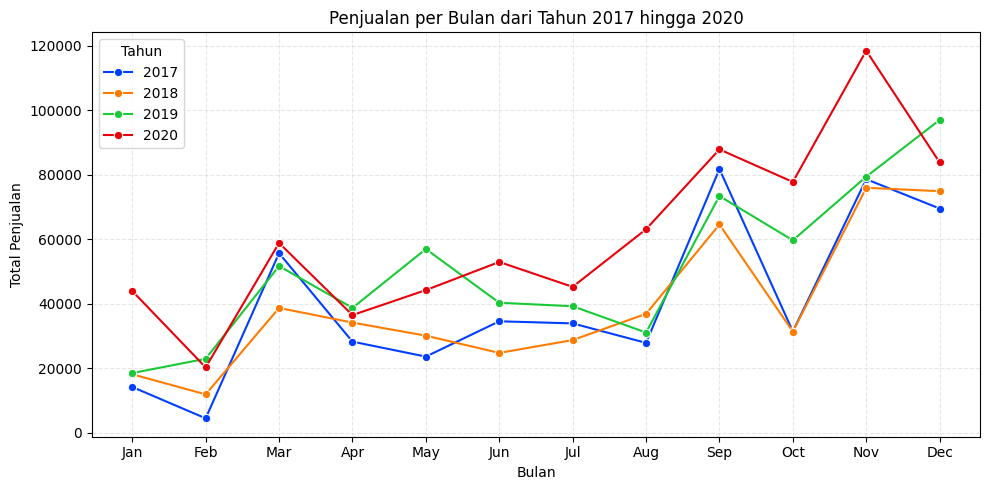

In [31]:
# Asumsi df_order sudah ada dan kolom 'Order Date' sudah dikonversi ke format datetime
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'])

# Filter data dari tahun 2017 hingga 2020
df_filtered = df_order[(df_order['Order Date'].dt.year >= 2017) & (df_order['Order Date'].dt.year <= 2020)]

# Ekstrak tahun dan bulan dari kolom 'Order Date'
df_filtered['Year'] = df_filtered['Order Date'].dt.year
df_filtered['Month'] = df_filtered['Order Date'].dt.month

# Kelompokkan berdasarkan tahun dan bulan, lalu hitung jumlah penjualan
sales_per_month = df_filtered.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_per_month, x='Month', y='Sales', hue='Year', marker='o', palette='bright')
plt.title('Penjualan per Bulan dari Tahun 2017 hingga 2020')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title='Tahun')
plt.show()


In [32]:
print(sales_per_month.head())

   Year  Month      Sales
0  2017      1  14236.895
1  2017      2   4519.892
2  2017      3  55691.009
3  2017      4  28295.345
4  2017      5  23648.287


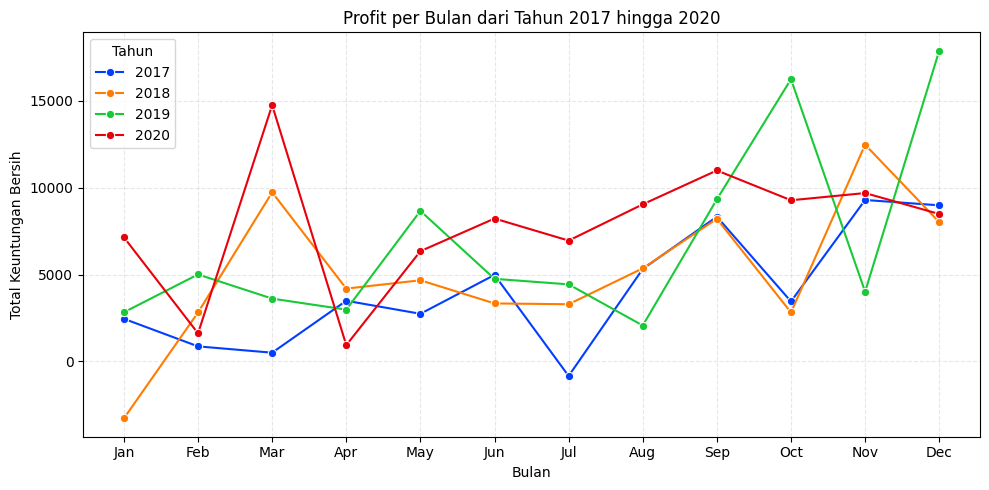

In [33]:
# Asumsi df_order sudah ada dan kolom 'Order Date' sudah dikonversi ke format datetime
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'])

# Filter data dari tahun 2017 hingga 2020
df_filtered = df_order[(df_order['Order Date'].dt.year >= 2017) & (df_order['Order Date'].dt.year <= 2020)]

# Ekstrak tahun dan bulan dari kolom 'Order Date'
df_filtered['Year'] = df_filtered['Order Date'].dt.year
df_filtered['Month'] = df_filtered['Order Date'].dt.month

# Kelompokkan berdasarkan tahun dan bulan, lalu hitung jumlah penjualan
sales_per_month = df_filtered.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_per_month, x='Month', y='Profit', hue='Year', marker='o', palette='bright')
plt.title('Profit per Bulan dari Tahun 2017 hingga 2020')
plt.xlabel('Bulan')
plt.ylabel('Total Keuntungan Bersih')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title='Tahun')
plt.show()


### b. Pelanggan

- Siapa pelanggan yang melakukan pembelian tertinggi dan detail pembelian mereka apa saja?

In [34]:
join_df = df_order.join(df_customer.set_index('Customer ID'),on='Customer ID', how='inner')
join_df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,Postal Code,Region,Product ID,Category,...,Product Name,Sales,Quantity,Discount,Profit,Year,Customer Name,Segment,City,State
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420,South,FUR-BO-10001798,Furniture,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2019,Claire Gute,Consumer,Henderson,Kentucky
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420,South,FUR-BO-10001798,Furniture,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2019,Claire Gute,Consumer,Henderson,Kentucky
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420,South,FUR-BO-10001798,Furniture,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2019,Claire Gute,Consumer,Houston,Texas


In [35]:
print(join_df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Country/Region', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Year', 'Customer Name', 'Segment', 'City', 'State'],
      dtype='object')


In [36]:
customer_sales = join_df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
customer_sales.head()

Customer Name
Ken Lonsdale    411081.641
Sean Miller     375645.750
Seth Vernon     367070.400
Greg Tran       342783.480
John Lee        333197.382
Name: Sales, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10992\1438924195.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


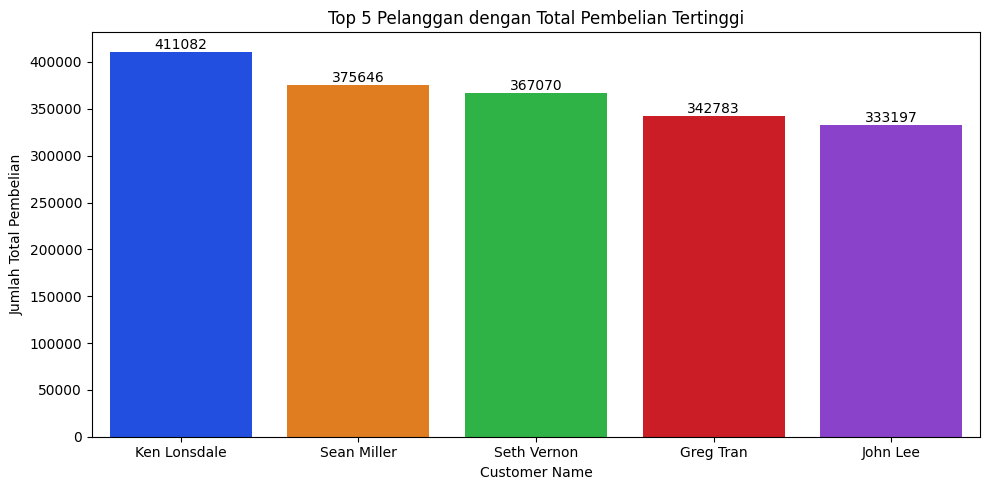

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsi join_df sudah ada dan siap digunakan

# Mengelompokkan dan menghitung total penjualan per pelanggan
customer_sales = join_df.groupby('Customer Name')['Sales'].sum()

# Mengurutkan dari yang terbesar
customer_sales_sorted = customer_sales.sort_values(ascending=False)

# Mengubah Series menjadi DataFrame
customer_sales_df = customer_sales_sorted.reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Customer Name',
    y='Sales',
    data=customer_sales_df.head(5),  # Menampilkan 5 pelanggan dengan penjualan tertinggi
    palette='bright'
)
plt.xticks(rotation=360, ha='center')
plt.xlabel('Customer Name')
plt.ylabel('Jumlah Total Pembelian')

# Menambahkan anotasi
for index, value in enumerate(customer_sales_df.head(5)['Sales']):
    plt.annotate(str(round(value, )), xy=(index, value), ha='center', va='bottom')

# Menambahkan title
plt.title('Top 5 Pelanggan dengan Total Pembelian Tertinggi')

plt.tight_layout()
plt.show()


In [38]:
top_customer = customer_sales.idxmax()
top_customer_sales = customer_sales.max()

# Memfilter detail pembelian untuk pelanggan tertinggi
top_customer_details = join_df[join_df['Customer Name'] == top_customer]

# Menampilkan hasil
print('Pelanggan dengan total penjualan tertinggi:')
print('Nama Pelanggan:', top_customer)
print('Total Pembelian:', top_customer_sales)

Pelanggan dengan total penjualan tertinggi:
Nama Pelanggan: Ken Lonsdale
Total Pembelian: 411081.641


In [39]:
unique_data = top_customer_details[['Customer Name', 'Product Name']].drop_duplicates()
print(unique_data)

     Customer Name                                       Product Name
237   Ken Lonsdale                                         Xerox 1957
238   Ken Lonsdale  Luxo Professional Fluorescent Magnifier Lamp w...
239   Ken Lonsdale                         Staple-based wall hangings
240   Ken Lonsdale                  PureGear Roll-On Screen Protector
241   Ken Lonsdale                               KI Conference Tables
242   Ken Lonsdale                   Eldon 100 Class Desk Accessories
243   Ken Lonsdale  Binney & Smith Crayola Metallic Colored Pencil...
339   Ken Lonsdale       OIC Binder Clips, Mini, 1/4" Capacity, Black
1444  Ken Lonsdale                       Mitel MiVoice 5330e IP Phone
2504  Ken Lonsdale       Fellowes Personal Hanging Folder Files, Navy
2505  Ken Lonsdale        High Speed Automatic Electric Letter Opener
2735  Ken Lonsdale                                     BlackBerry Q10
2736  Ken Lonsdale        Adams Telephone Message Books, 5 1/4” x 11”
2737  Ken Lonsdale  

In [40]:
data_product = unique_data['Product Name']
data_product

237                                            Xerox 1957
238     Luxo Professional Fluorescent Magnifier Lamp w...
239                            Staple-based wall hangings
240                     PureGear Roll-On Screen Protector
241                                  KI Conference Tables
242                      Eldon 100 Class Desk Accessories
243     Binney & Smith Crayola Metallic Colored Pencil...
339          OIC Binder Clips, Mini, 1/4" Capacity, Black
1444                         Mitel MiVoice 5330e IP Phone
2504         Fellowes Personal Hanging Folder Files, Navy
2505          High Speed Automatic Electric Letter Opener
2735                                       BlackBerry Q10
2736          Adams Telephone Message Books, 5 1/4” x 11”
2737                              Bestar Classic Bookcase
2738     Innergie mMini Combo Duo USB Travel Charging Kit
3229                          Tennsco Single-Tier Lockers
4417              GBC Recycled Regency Composition Covers
4671          

- Di antara pelanggan yang terdaftar, siapa yang melakukan pembelian terbanyak (dilihat dari jumlah barang yang dibeli) dan detail pembelian mereka apa saja?

In [41]:
customer_sales_count = join_df.groupby('Customer Name')['Sales'].count()
customer_sales_count.head()

Customer Name
Aaron Bergman       36
Aaron Hawkins      121
Aaron Smayling     100
Adam Bellavance    324
Adam Hart          400
Name: Sales, dtype: int64

In [42]:
customer_sales_count = customer_sales_count.rename('Purchased Item').reset_index()
customer_sales_count.head(20)

,Customer Name,Purchased Item
0,Aaron Bergman,36
1,Aaron Hawkins,121
2,Aaron Smayling,100
3,Adam Bellavance,324
4,Adam Hart,400
5,Adam Shillingsburg,625
6,Adrian Barton,400
7,Adrian Hane,256
8,Adrian Shami,9
9,Aimee Bixby,144


In [43]:
top_5_customers = customer_sales_count.sort_values(by='Purchased Item', ascending=False).head(5)
top_5_customers

,Customer Name,Purchased Item
787,William Brown,1369
502,Matt Abelman,1156
387,John Lee,1156
595,Paul Prost,1156
249,Edward Hooks,1024


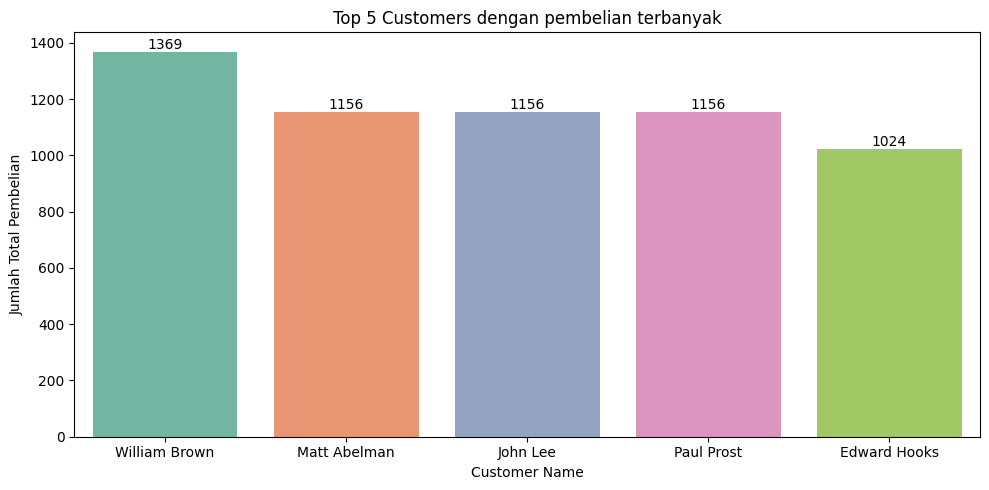

In [44]:
top_5_customers = customer_sales_count.sort_values(by='Purchased Item', ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Customer Name',
    y='Purchased Item',
    data=top_5_customers,
    hue='Customer Name',
    palette='Set2'
)
plt.xticks(rotation=360, ha='center')
plt.xlabel('Customer Name')
plt.ylabel('Jumlah Total Pembelian')

for index, value in enumerate(top_5_customers['Purchased Item']):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.title('Top 5 Customers dengan pembelian terbanyak')
plt.tight_layout()
plt.show()


- Bagaimana distribusi segmen pelanggan dalam data?

In [45]:
segment_distribution = join_df['Segment'].value_counts()

print("Distribusi Segmen Pelanggan:")
print(segment_distribution)

Distribusi Segmen Pelanggan:
Segment
Consumer       82229
Corporate      47792
Home Office    26795
Name: count, dtype: int64


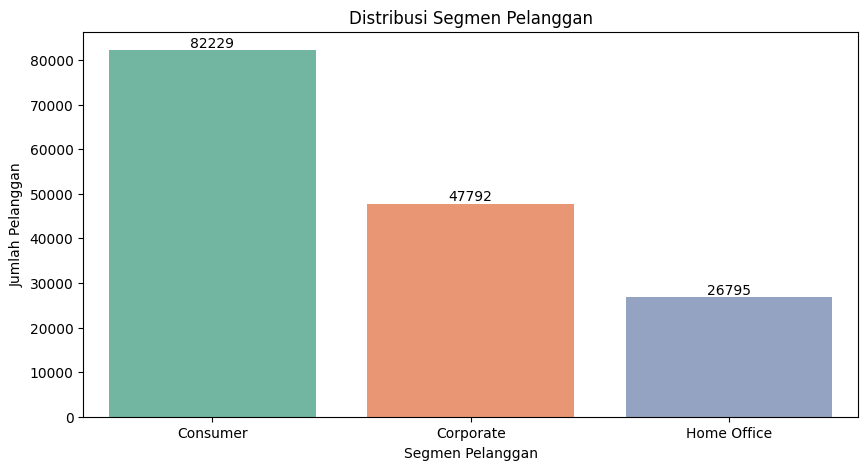

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=join_df, x='Segment', palette='Set2', hue='Segment')
plt.title('Distribusi Segmen Pelanggan')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(ha='center')

for index, value in enumerate(join_df['Segment'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

### c. Metode Pengiriman

- Berapa jumlah pesanan yang dikirim menggunakan metode pengiriman "Second Class"?

In [47]:
df_order.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Country/Region', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Year'],
      dtype='object')

In [48]:
df_customer.columns

Index(['Customer ID', 'Customer Name', 'Segment', 'City', 'State'], dtype='object')

In [49]:
ship_mode = join_df[['Ship Mode','Sales']]
ship_mode

,Ship Mode,Sales
0,Second Class,261.96
0,Second Class,261.96
0,Second Class,261.96
0,Second Class,261.96
0,Second Class,261.96
...,...,...
9563,First Class,6.00
9563,First Class,6.00
9563,First Class,6.00
9563,First Class,6.00


In [50]:
subset_ship_mode = ship_mode[ship_mode['Ship Mode']=='Second Class']
subset_ship_mode


,Ship Mode,Sales
0,Second Class,261.96
0,Second Class,261.96
0,Second Class,261.96
0,Second Class,261.96
0,Second Class,261.96
...,...,...
9209,Second Class,7.28
9210,Second Class,5.40
9210,Second Class,5.40
9210,Second Class,5.40


In [51]:
count_ship_mode = subset_ship_mode['Ship Mode'].count()
print('Jumlah total pengiriman menggunakan Second Class:', count_ship_mode)

Jumlah total pengiriman menggunakan Second Class: 30603


In [52]:
count_all_ship = join_df['Ship Mode'].value_counts()
count_all_ship

Ship Mode
Standard Class    93770
Second Class      30603
First Class       23666
Same Day           8777
Name: count, dtype: int64

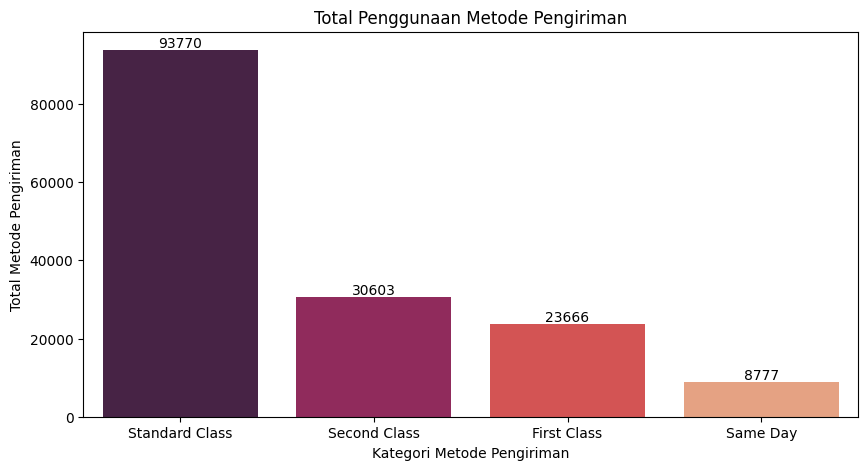

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=count_all_ship.index,
    y=count_all_ship.values,
    hue=count_all_ship.index,
    palette='rocket'
)

# Menambahkan label pada barplot
for index, value in enumerate(count_all_ship.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Kategori Metode Pengiriman')
plt.ylabel('Total Metode Pengiriman')
plt.title('Total Penggunaan Metode Pengiriman')
plt.show()

### d. Diskon dan Keuntungan

In [54]:
df_order.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Country/Region', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Year'],
      dtype='object')

- Berapa persentase diskon rata-rata yang diberikan untuk setiap kategori produk?

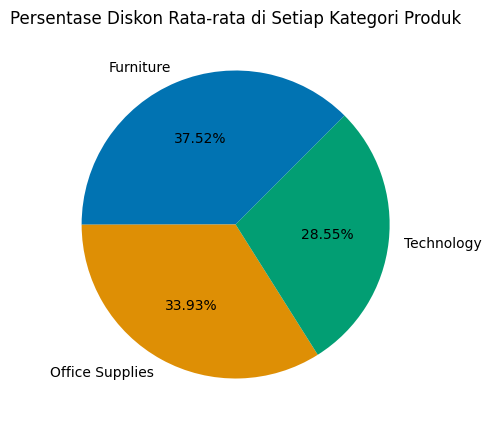

In [55]:
# Menghitung diskon rata-rata untuk setiap kategori produk
avg_disc_by_category = df_order.groupby('Category')['Discount'].mean()

# Normalisasi persentase agar totalnya adalah 100%
total_percentage = avg_disc_by_category.sum()
percentage_disc_by_category = (avg_disc_by_category / total_percentage) * 100

plt.figure(figsize=(10, 5))
palette = sns.color_palette("colorblind", len(percentage_disc_by_category))
plt.pie(
    percentage_disc_by_category,
    labels=percentage_disc_by_category.index,
    autopct='%0.2f%%',
    startangle=45,
    colors=palette)
plt.title('Persentase Diskon Rata-rata di Setiap Kategori Produk')
plt.show()


- Kategori produk mana yang memiliki margin keuntungan rata-rata tertinggi?

In [56]:
avg_profit_by_category = df_order.groupby('Category')['Profit'].mean()

In [57]:
# highest_profit_category = avg_profit_by_category.idxmax()
# highest_profit_category
# highest_profit_value = avg_profit_by_category.max()
# highest_profit_value
avg_profit_by_category

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

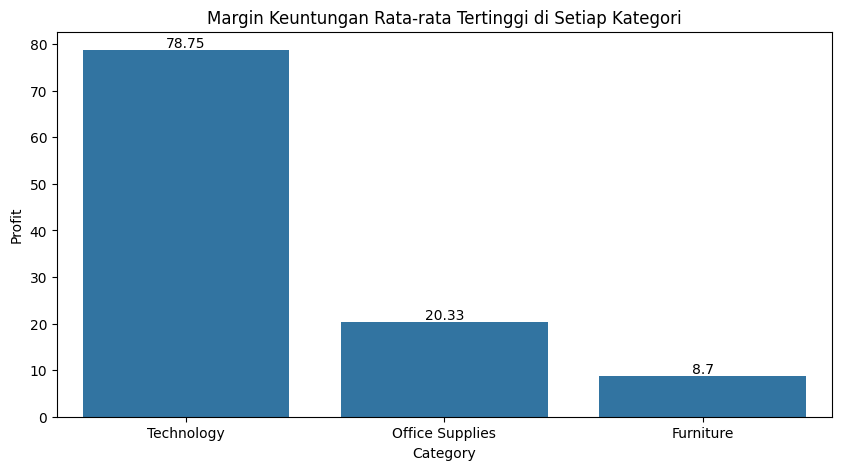

In [58]:
# Merubah Series ke Dataframe
df_avg_profit_by_category = avg_profit_by_category.reset_index()

# Mengurutkan berdasarkan kolom Profit
df_avg_profit_by_category = df_avg_profit_by_category.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_avg_profit_by_category,
    x='Category',
    y='Profit'
)

# Menambahkan label pada barplot
for index, row in enumerate(df_avg_profit_by_category['Profit']):
    plt.text(index, row, str(round(row, 2)), ha='center', va='bottom')

plt.title('Margin Keuntungan Rata-rata Tertinggi di Setiap Kategori')
plt.show()

### e. Produk

- Berapa total kuantitas yang terjual untuk setiap sub-kategori produk?

In [59]:
df_order.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Country/Region', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Year'],
      dtype='object')

In [60]:
count_sub_category = df_order['Sub-Category'].value_counts()
count_sub_category

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10992\2802666470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


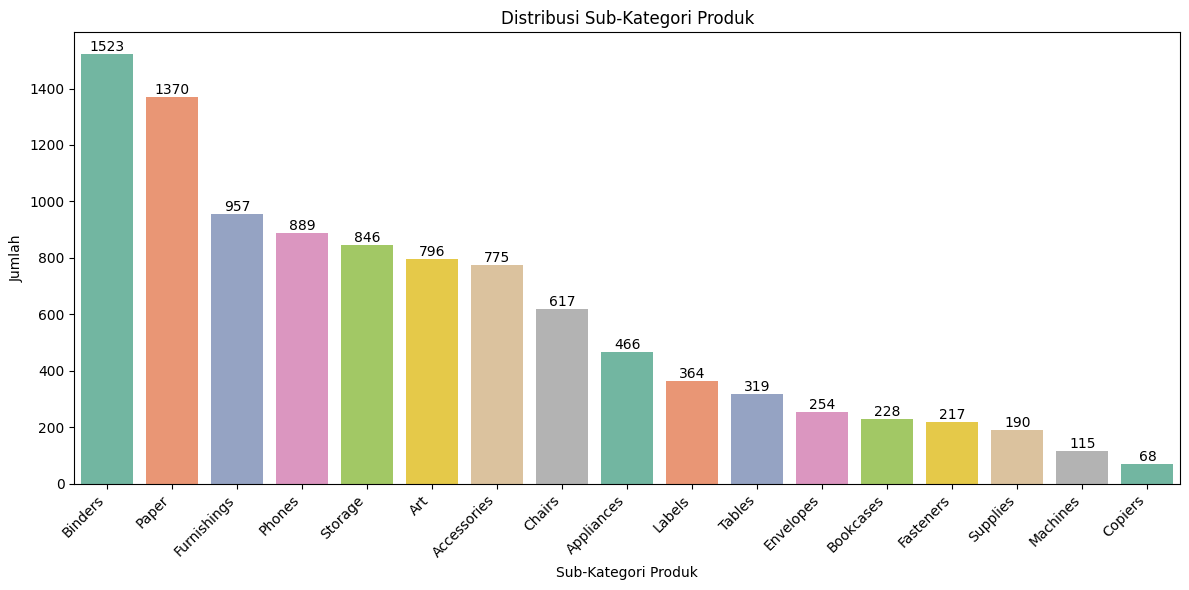

In [61]:
# Misalnya, ini adalah contoh Series yang berisi jumlah sub-kategori produk
count_sub_category = df_order['Sub-Category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=count_sub_category.index,
    y=count_sub_category.values,
    palette='Set2'
)
plt.title('Distribusi Sub-Kategori Produk')
plt.xlabel('Sub-Kategori Produk')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')

# Menambahkan label di atas setiap bar
for index, value in enumerate(count_sub_category):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


- Apakah ada kategori produk tertentu yang mendominasi penjualan? Bagaimana distribusi penjualan di antara sub-kategori produk?

In [62]:
sales_by_category = df_order.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

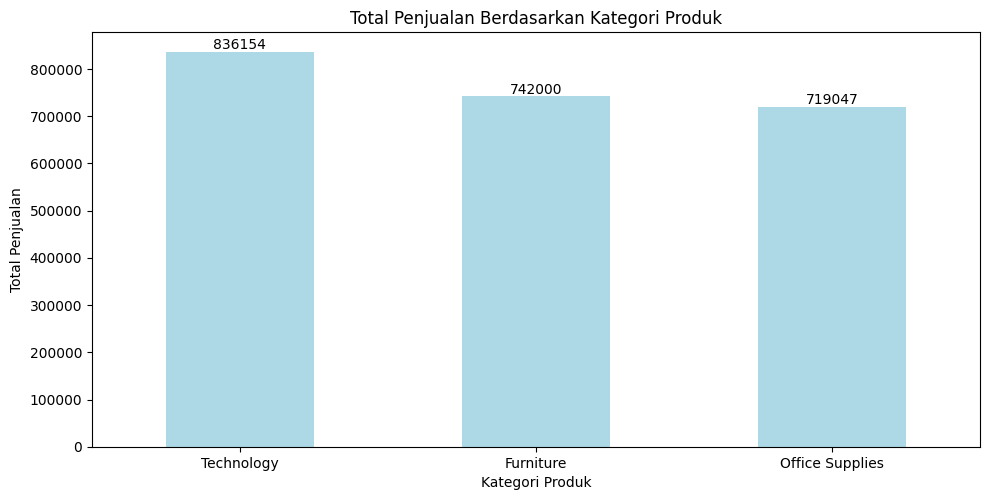

In [63]:
# Menghitung total penjualan berdasarkan kategori produk
sales_by_category = df_order.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Plot untuk total penjualan berdasarkan kategori produk
sales_by_category.plot(kind='bar', color='lightblue')
plt.title('Total Penjualan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')

plt.tight_layout()

# Menambahkan label pada barplot
for index, value in enumerate(sales_by_category):
    plt.text(index, value, str(round(value,)), ha='center', va='bottom')

plt.xticks(rotation=360, ha='center')
plt.show()

In [64]:
sales_by_subcategory = df_order.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sales_by_subcategory

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

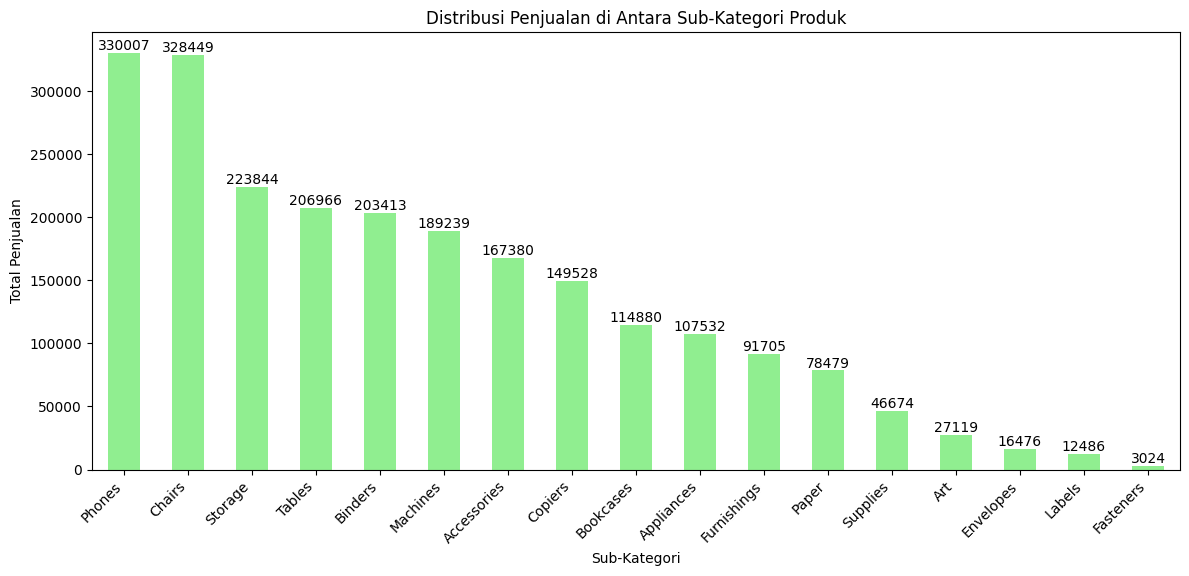

In [65]:
# Menghitung distribusi penjualan di antara sub-kategori produk
sales_by_subcategory = df_order.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Membuat visualisasi
plt.figure(figsize=(12, 6))

# Plot untuk distribusi penjualan di antara sub-kategori produk
sales_by_subcategory.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Penjualan di Antara Sub-Kategori Produk')
plt.xlabel('Sub-Kategori')
plt.ylabel('Total Penjualan')

plt.tight_layout()

# Menambahkan label pada barplot
for index, value in enumerate(sales_by_subcategory):
    plt.text(index, value, str(round(value,)), ha='center', va='bottom')
    
plt.xticks(rotation=45, ha='right')
plt.show()

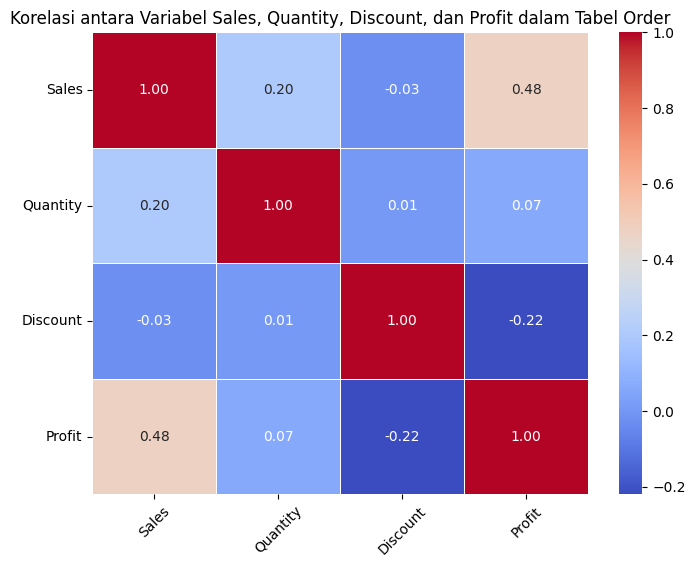

In [66]:
correlation_order = df_order[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_order, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi antara Variabel Sales, Quantity, Discount, dan Profit dalam Tabel Order')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 9. Conclusion & Recommendation

# 10. Connect to Database MySQL

In [67]:
# # connect database
# db = mysql.connector.connect(
#     host = 'localhost',
#     user = 'root', 
#     password = '',
#     database = ''
# )

# # membuat database
# cursor = db.cursor()
# cursor.execute('create database superstore_sales')
# print('db berhasil dibuat')

In [68]:
# connect database
db = mysql.connector.connect(
    host = 'localhost',
    user = 'root', 
    password = '',
    database = 'superstore_sales'
)

if db.is_connected():
    print('berhasil connect ke db')

DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)

In [ ]:
# membuat tabel customer di database
cursor = db.cursor()
cursor.execute(
    """
    create table customer(
    customer_id varchar(100) not null,
    customer_name varchar(100) not null,
    segment varchar(50) not null,
    city varchar(100) not null,
    state varchar(100) not null)
    """
)
print('table berhasil dibuat')

table berhasil dibuat


In [ ]:
# membuat tabel order di database
cursor = db.cursor()
cursor.execute(
    """
    create table orders(
    order_id varchar(100) not null,
    order_date date not null,
    ship_date date not null,
    ship_mode varchar(100) not null,
    customer_id varchar(100) not null,
    country varchar(100) not null,
    postal_code int not null,
    region varchar(100) not null,
    product_id varchar(100) not null,
    category varchar(100) not null,
    sub_category varchar(100) not null,
    product_name varchar(255) not null,
    sales float not null,
    quantity int not null,
    discount float not null,
    profit float not null)
    """
)
print('table berhasil dibuat')

table berhasil dibuat


In [ ]:
for index, row in df_customer.iterrows():
    # Extract values from the Series for each row
    values = (row['Customer ID'], row['Customer Name'], row['Segment'], row['City'], row['State'])
    
    # Execute SQL INSERT statement
    cursor.execute("""
        INSERT INTO customer (customer_id, customer_name, segment, city, state) 
        VALUES (%s, %s, %s, %s, %s)
    """, values)

# Commit the transaction
db.commit()

In [ ]:
for index, row in df_order.iterrows():
    # Extract values from the Series for each row
    values = (row['Order ID'], row['Order Date'], row['Ship Date'], row['Ship Mode'], row['Customer ID'], row['Country/Region'], 
              row['Postal Code'], row['Region'], row['Product ID'], row['Category'], row['Sub-Category'], row['Product Name'], 
              row['Sales'], row['Quantity'], row['Discount'], row['Profit'])
    
    # Execute SQL INSERT statement
    cursor.execute("""
        INSERT INTO orders (order_id, order_date, ship_date, ship_mode, customer_id, country, postal_code, region, product_id,
                   category, sub_category,product_name, sales, quantity,discount, profit) 
        VALUES (%s, %s, %s, %s, %s, %s,%s,%s, %s,%s,%s,%s,%s,%s,%s,%s)
    """, values)

# Commit the transaction
db.commit()


In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        9994 non-null   object        
 1   Order Date      9994 non-null   datetime64[ns]
 2   Ship Date       9994 non-null   datetime64[ns]
 3   Ship Mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Country/Region  9994 non-null   object        
 6   Postal Code     9994 non-null   int32         
 7   Region          9994 non-null   object        
 8   Product ID      9994 non-null   object        
 9   Category        9994 non-null   object        
 10  Sub-Category    9994 non-null   object        
 11  Product Name    9994 non-null   object        
 12  Sales           9994 non-null   float64       
 13  Quantity        9994 non-null   int64         
 14  Discount        9994 non-null   float64       
 15  Prof

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    9994 non-null   object
 1   Customer Name  9994 non-null   object
 2   Segment        9994 non-null   object
 3   City           9994 non-null   object
 4   State          9994 non-null   object
dtypes: object(5)
memory usage: 390.5+ KB


In [ ]:
df_customer.shape

(9994, 5)

In [ ]:
df_order.shape

(9994, 17)